In [5]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,KFold 
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report

# pd.set_option("display.max_rows",None)
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv(r"I:\1 murali\great learning\Internship\Codsoft\IRIS (1).csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.describe(include="O")

,species
count,150
unique,3
top,Iris-setosa
freq,50


In [9]:
df.shape

(150, 5)

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### EDA

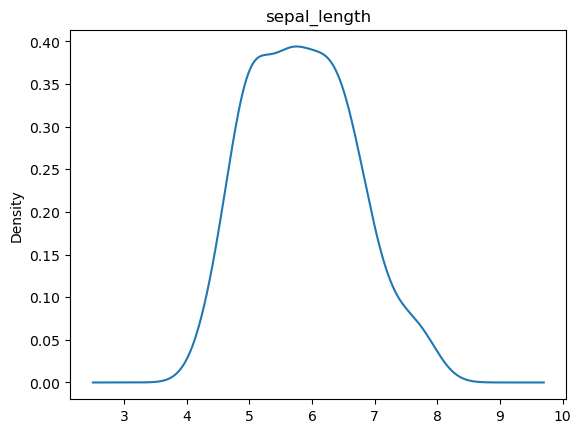

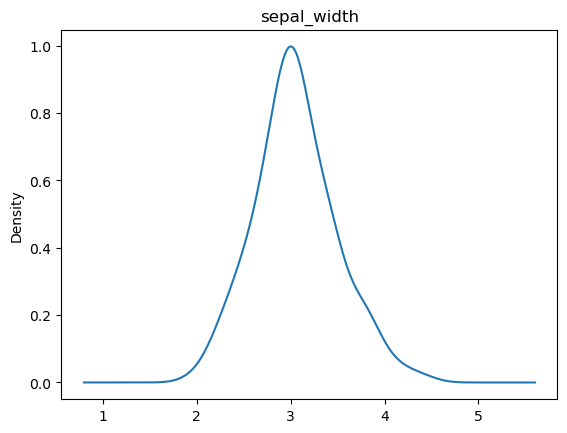

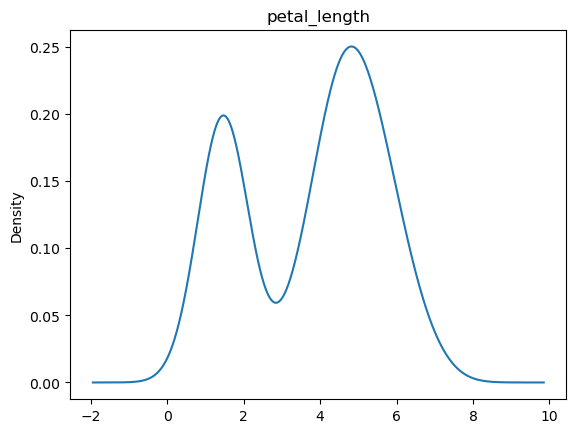

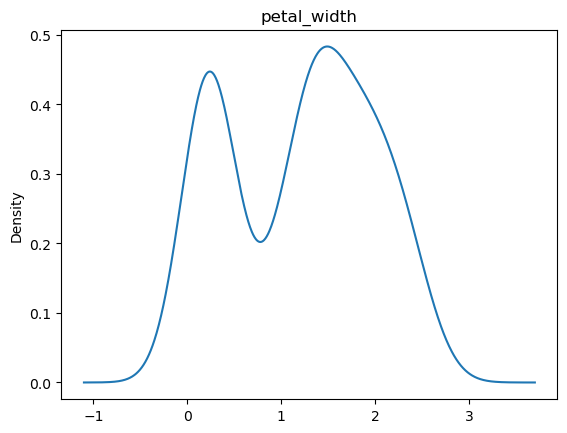

In [11]:
for i in df.select_dtypes(exclude="O").columns:
    df[i].plot(kind="kde")
    plt.title(i)
    plt.show()

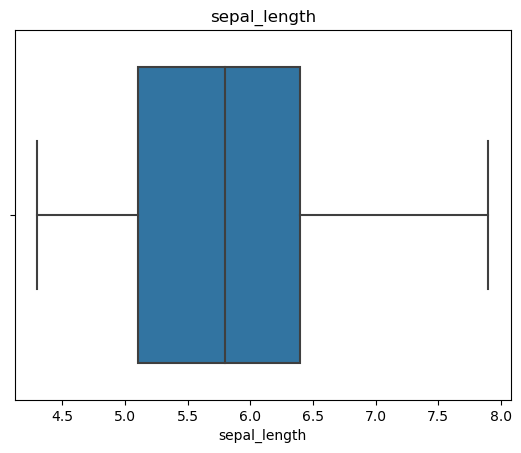

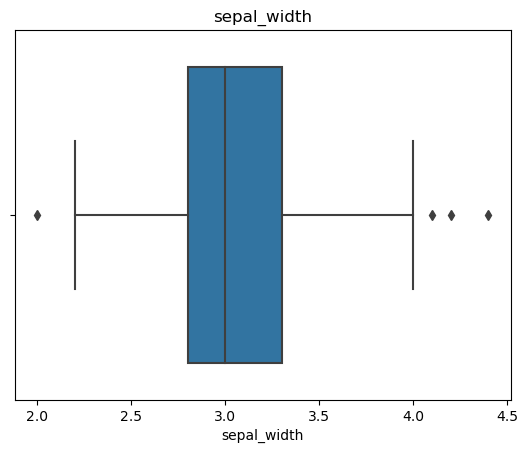

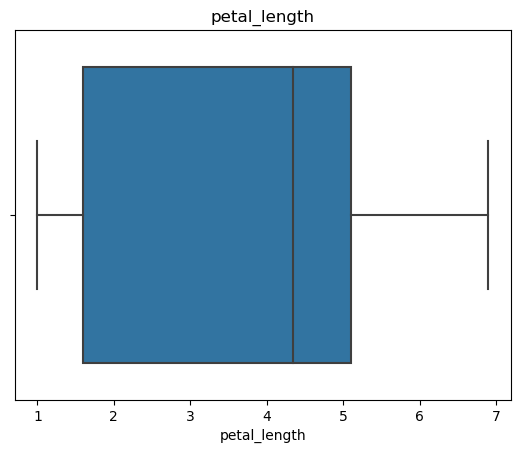

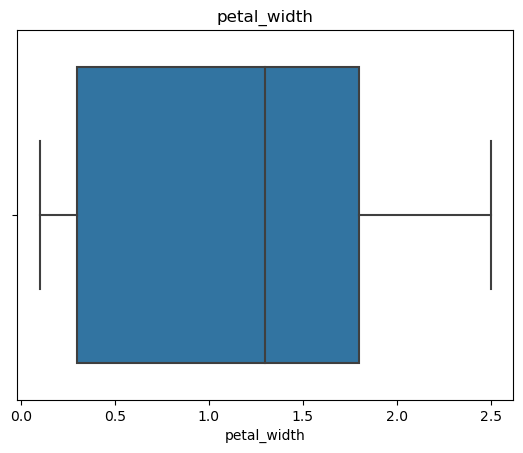

In [12]:
for i in df.select_dtypes(exclude="O").columns:
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

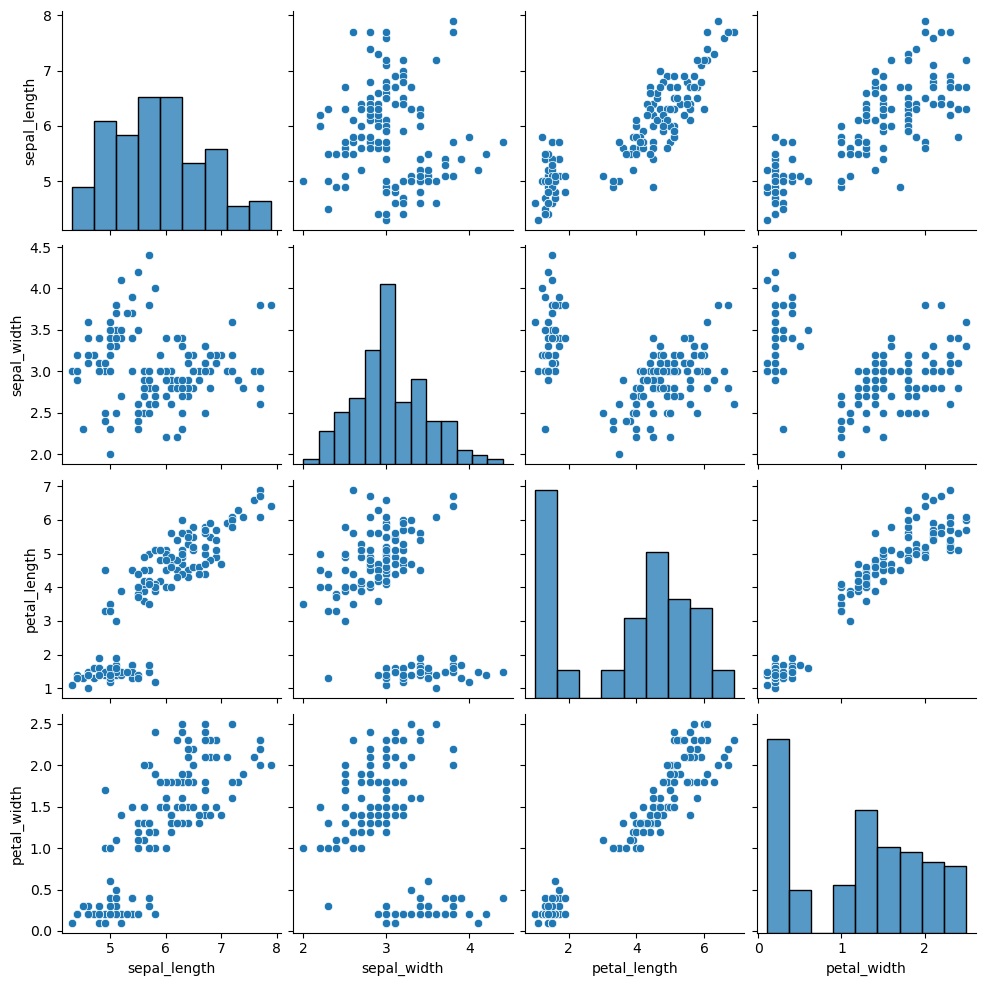

In [13]:
sns.pairplot(df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

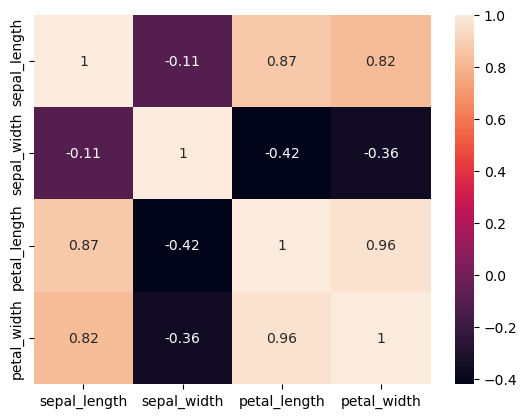

In [14]:
sns.heatmap(df.corr(),annot=True)
plt.show

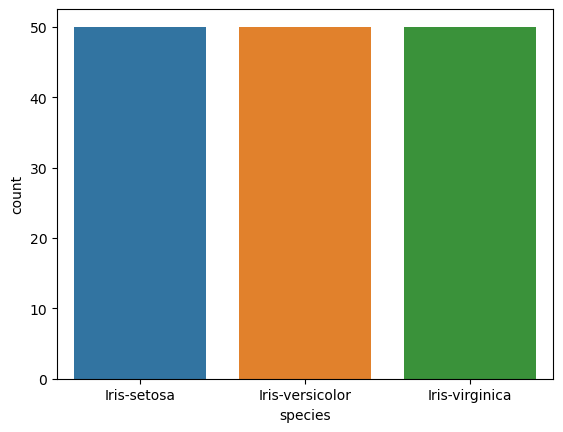

In [15]:
sns.countplot(x=df["species"])
plt.show()

In [16]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

#### Seperating Target and Variables

In [17]:
x = df.drop("species",axis=1)
y = df["species"]

#### Scaling the variables

In [18]:
for i in x.columns:
    sc = StandardScaler()
    x[i] = sc.fit_transform(x[[i]])

In [19]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


#### Encoding Target

In [20]:
lc = LabelEncoder()
y = lc.fit_transform(y)

#### Train Test Split

In [21]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,random_state=10,test_size=0.20)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((120, 4), (30, 4), (120,), (30,))

#### User Defined Function

In [22]:
col = pd.MultiIndex.from_product([["Train","Test"],["Accuracy","F1 Score","Recall","Precision"]])
model_score = pd.DataFrame(columns=col)
model_score.index.name = "Model Name"

In [23]:
model_score

Empty DataFrame
Columns: [(Train, Accuracy), (Train, F1 Score), (Train, Recall), (Train, Precision), (Test, Accuracy), (Test, F1 Score), (Test, Recall), (Test, Precision)]
Index: []

In [24]:
def model_cal(model_df,model_name,model,x,y):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,random_state=10,test_size=0.20)
    xtrain.shape,xtest.shape,ytrain.shape,ytest.shape
    model.fit(xtrain,ytrain)
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    train_acc = accuracy_score(ytrain,ypred_train)
    train_f1 = f1_score(ytrain,ypred_train,average="weighted")
    train_rec = recall_score(ytrain,ypred_train,average="weighted")
    train_pres = precision_score(ytrain,ypred_train,average="weighted")
    test_acc = accuracy_score(ytest,ypred_test)
    test_f1 = f1_score(ytest,ypred_test,average="weighted")
    test_rec = recall_score(ytest,ypred_test,average="weighted")
    test_pres = precision_score(ytest,ypred_test,average="weighted")
    model_df.loc[model_name,:]=[train_acc,train_f1,train_rec,train_pres,test_acc,test_f1,test_rec,test_pres]
    print(classification_report(ytrain,ypred_train))
    print(classification_report(ytest,ypred_test))
    return model_df

#### Logistic Regression

In [25]:
lr = LogisticRegression(random_state=10)
model_cal(model_score,"Logistic Regression",lr,x,y)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.92      0.94        37
           2       0.93      0.98      0.95        43

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Train                                   Test           \
                     Accuracy  F1 Score    Recall Precision Accuracy F1 Score   
Model Name                                                                      
Logistic Regression  0.966667  0.966582  0.966667  0.967302      1.0      1.0   

                                      
                    Recall Precision  
Model Name                            
Logistic Regression    1.0       1.0

#### Decision Tree

In [26]:
dt = DecisionTreeClassifier(random_state=10)
model_cal(model_score,"Decision Tree",dt,x,y)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        43

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Train                                    Test  \
                     Accuracy  F1 Score    Recall Precision  Accuracy   
Model Name                                                              
Logistic Regression  0.966667  0.966582  0.966667  0.967302       1.0   
Decision Tree             1.0       1.0       1.0       1.0  0.966667   

                                                   
                     F1 Score    Recall Precision  
Model Name                                         
Logistic Regression       1.0       1.0       1.0  
Decision Tree        0.967111  0.966667  0.970833

#### Random Forest

In [27]:
rf = RandomForestClassifier(random_state=10)
model_cal(model_score,"Random Forest",rf,x,y)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        43

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Train                                    Test  \
                     Accuracy  F1 Score    Recall Precision  Accuracy   
Model Name                                                              
Logistic Regression  0.966667  0.966582  0.966667  0.967302       1.0   
Decision Tree             1.0       1.0       1.0       1.0  0.966667   
Random Forest             1.0       1.0       1.0       1.0       1.0   

                                                   
                     F1 Score    Recall Precision  
Model Name                                         
Logistic Regression       1.0       1.0       1.0  
Decision Tree        0.967111  0.966667  0.970833  
Random Forest             1.0       1.0       1.0

#### AdaBoost

In [28]:
adb = AdaBoostClassifier(random_state=10)
model_cal(model_score,"AdaBoost",adb,x,y)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.88      0.95      0.91        37
           2       0.95      0.88      0.92        43

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.98      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



Train                                    Test  \
                     Accuracy  F1 Score    Recall Precision  Accuracy   
Model Name                                                              
Logistic Regression  0.966667  0.966582  0.966667  0.967302       1.0   
Decision Tree             1.0       1.0       1.0       1.0  0.966667   
Random Forest             1.0       1.0       1.0       1.0       1.0   
AdaBoost             0.941667  0.941749  0.941667  0.943542  0.966667   

                                                   
                     F1 Score    Recall Precision  
Model Name                                         
Logistic Regression       1.0       1.0       1.0  
Decision Tree        0.967111  0.966667  0.970833  
Random Forest             1.0       1.0       1.0  
AdaBoost             0.966002  0.966667  0.969048

#### Gradient Boosting

In [29]:
gdb = GradientBoostingClassifier(random_state=10)
model_cal(model_score,"Gradient Boosting",gdb,x,y)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        43

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Train                                    Test  \
                     Accuracy  F1 Score    Recall Precision  Accuracy   
Model Name                                                              
Logistic Regression  0.966667  0.966582  0.966667  0.967302       1.0   
Decision Tree             1.0       1.0       1.0       1.0  0.966667   
Random Forest             1.0       1.0       1.0       1.0       1.0   
AdaBoost             0.941667  0.941749  0.941667  0.943542  0.966667   
Gradient Boosting         1.0       1.0       1.0       1.0       1.0   

                                                   
                     F1 Score    Recall Precision  
Model Name                                         
Logistic Regression       1.0       1.0       1.0  
Decision Tree        0.967111  0.966667  0.970833  
Random Forest             1.0       1.0       1.0  
AdaBoost             0.966002  0.966667  0.969048  
Gradient Boosting         1.0       1.0       1.0

* AdaBoost gives a good results in both train and test dataset